_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Zhang yu (group c) 
 - Zeng yongjia (group c)

# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [1]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [2]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [4]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

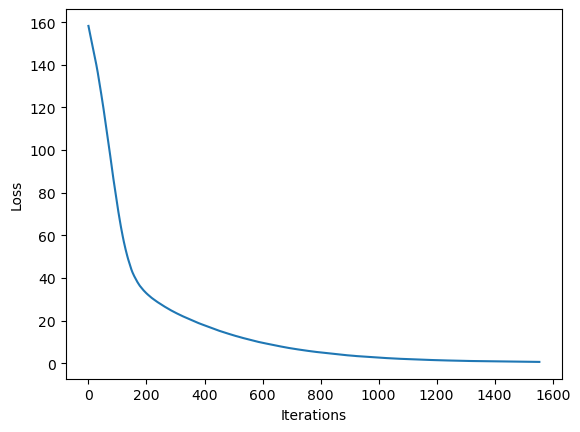

In [5]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

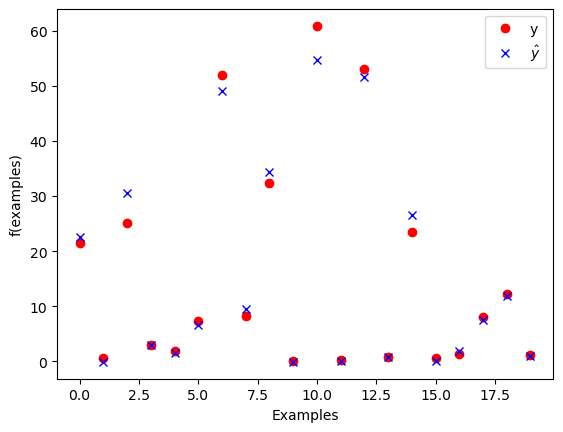

In [6]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?
</div>
<!-- Question End -->

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

    1 on utilise la configuration default, il y a 100 neurones pour chaque couche, et par défault il y a un seul couche.
    2 comme on n'a pas précisé le solver quand on initialiser, on utilise ‘adam’ (refers to a stochastic gradient-based optimizer)  par défaut, dans le cours on a étudié cet algorithme:Stochastic gradient descent.
    3 quand il arrive le max-iter, ici c'est 3000 , cela garantie que l'entrainnement ne se poursuit pas indéfiniment. ici comme on n'a pas modifié early stopping, donc cet algo ne va pas arrette en avance, mais normalement quand la perte est converge ,ça veut dire que la perte d'entraînement atteint un seuil acceptable. Cela indique que le modèle a convergé vers une solution acceptable.





</div>
<!-- Answer Section End -->

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [195]:
# clean all previously defined variables for the sailing boats
%reset -f

In [196]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(f"dataset type : {type(cal_housing)}")
print(f"number of data : {len(cal_housing.data)}")
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = pd.DataFrame(cal_housing.target,columns=["target"])

X_all, y_all = shuffle(X_all, y_all, random_state=1)

display(X_all.head(10)) # print the first 10 values
display(y_all.head(10))

dataset type : <class 'sklearn.utils._bunch.Bunch'>
number of data : 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


,target
4712,3.550
2151,0.707
15927,2.294
82,1.125
8161,2.254
6636,2.630
17333,2.268
19081,1.662
13298,1.180
7157,1.563


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Data Preparation

The dataset consists of 20,000 datas. We first extract the last 5,000 for test samples, which we will use later.

For training and validation, we will use a subset consisting of only 2,000 datas to speed up computations.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Split those 2000 remaining dataset between a training set and a validation set (see usage of `train_test_split` function earlier)
- Why did you choose this partition?
- What is the purpose of each subset (train, validation, test) ?

</div>
<!-- Question End -->


Please use the conventional names `X_train`, `X_val`, `y_train` and `y_val`.

In [197]:
# use the last N samples for test (for later use)
num_test_samples = 5000
X_test, y_test = X_all[-num_test_samples:], y_all[-num_test_samples:]

# only use the first N samples to limit training time
num_samples = 2000
X, y = X_all[:num_samples], y_all[:num_samples]

In [198]:
# TODO
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=1, test_size=0.05)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
    
    Question 2:
    on a choisi une petite portion pour les datas de test, pour éviter de overfitting.
    
    question 3: 
    - train: Cet ensemble est utilisé pour entraîner le modèle. L'objectif est de permettre au modèle d'apprendre la structure et les tendances présentes dans les données.
    
    - validation : Utilisé pour évaluer le modèle pendant l'entraînement. Cela permet de vérifier si cet ensemble pour faire des ajustements fins sur le modèle, pour qu'il puisse mieux performer, un peu comme on ajusterait sa méthode d'étude avant un grand examen.
    
    - test : Après que le modèle ait été ajusté et entraîné ,cet ensemble fournit une évaluation finale . Il montre comment le modèle va se comporter dans des situations réelles, avec de nouvelles données qu'il n'a jamais vues. Cela permet de s'assurer que le modèle est prêt à être utilisé dans le monde réel, ou de comparer sa performance à celle d'autres modèles pour voir lequel est le meilleur.






</div>
<!-- Answer Section End -->

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Using the `StandardScaler`, first fit this scaler on your training dataset (`X_train`), then use this fitted scaler to transform the training dataset, the validation dataset (`X_val`), and the test dataset (`X_test`).


- Why is it important to fit the scaler only on the training data and not on the entire dataset or separately on each dataset?

</div>
<!-- Question End -->

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_val= sc.transform(X_val)
X_test=sc.transform(X_test)



<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

    garder la meme valeur moyenne et le meme écart-type pour tout les données, si on n'utilise que 2000 données pour entrainer, alors le modèl basé de ces données, et les valeurs moyennes et les écart-types sont basé de ces données aussi. Si on donne tous les données pour le scaler, ça veut dire le model "reconnait" les données qu'il a déjà vu, plutot que d'apprendre à partir des nouvelles données.  






</div>
<!-- Answer Section End -->

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible. While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Propose a parameterization of the network (number of neurons per layer, number of layers, epochs, learning rates) that will maximize the train score (without considering the test score). Ensure that you disable any form of internal validation checks such as early stopping to promote overfitting.

- Is the **validation** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.
</div>
<!-- Question End -->

In [200]:
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
mlp = MLPRegressor(hidden_layer_sizes=(100, 80,60,40), # 4 couches avec 100,80,60,40 neurones
                   activation='relu',           
                   solver='adam',                 
                   max_iter=3000,                
                   random_state=1) 
mlp.fit(X_train, y_train) 
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_val, y_val))


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score:  0.9585888747786508
Test score:   0.5925719726198875


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

    - validation score est plus petit que train score

    - hidden_layer_sizes=(100, 80,60,40)  on a fixé 4 couches avec 100,80,60,40 neurones
      activation='relu',          nous avons choisit :the rectified linear unit function (ReLu) 
      solver='adam',              nous utilisons "adam"(stochastic gradient descent (SGD)) comme l'algorithme       
      max_iter=3000,              le max d'iteration est 3000          
      random_state=1              Détermine la génération de nombres aléatoires à 1



</div>
<!-- Answer Section End -->

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **validation** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/val score
- training time

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Present in a table the various parameters tested and the associated results. 
</div>
<!-- Question End -->

You can find a cell in the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [214]:
# TODO
import time
mlp = MLPRegressor(hidden_layer_sizes=(100,200,300,200,100), # 4 couches avec 100,80,60,40 neurones
                   activation='relu',
                   early_stopping=True,
                   solver='adam',                 
                   max_iter=3000,
                   alpha=0.0003,
                   learning_rate_init=0.001,
                   random_state=1)
start_time=time.time()
mlp.fit(X_train, y_train)
end_time=time.time()
print('Train score: ', mlp.score(X_train, y_train))
print('Validation score:  ', mlp.score(X_val, y_val))
print('train time: ',end_time-start_time)

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score:  0.8728644040732881
Validation score:   0.7430546827401804
train time:  1.998474359512329


In [93]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
import numpy as np
data = []
data.append({'activation': 'relu', 'max_iter': '500', 'test_score': 0.87})
data.append({'activation': 'tanh', 'max_iter': '200', 'early_stopping': False, 'test_score': 0.91})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,activation,max_iter,test_score,early_stopping
1,tanh,200,0.91,False
0,relu,500,0.87,-


## Evaluation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
- Evaluate the score of your model on the test set that was not used for training nor for model selection.
- Train a model using your optimal parameters on the initial 15,000 data points. Evaluate the performance using the test set. What are your thoughts on the amount of data used? Do you believe the time spent is worthwhile in terms of the improvement in performance?
</div>
<!-- Question End -->

In [89]:
# TODO

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**







</div>
<!-- Answer Section End -->